本脚本是开发旋转目标检测时，用于验证旋转目标与四个点关系

主要包括以下功能：
1. 移动旋转目标框的一个点时，如何计算两个相邻点，使得保持矩形形状
2. 绕中心旋转目标框时，四个点如何计算
3. 已知两个点+鼠标位置，计算这个旋转矩形的四个点

In [1]:
# read code tools
# share in https://gist.github.com/WuShaogui/19c690bde2a0fe70b061d50e20129531
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

# 移动某个点，计算另外两个动点

[[[200 200]]

 [[468 354]]

 [[500 300]]

 [[231 145]]]
[[[200 200]]

 [[393 311]]

 [[400 300]]

 [[206 188]]]


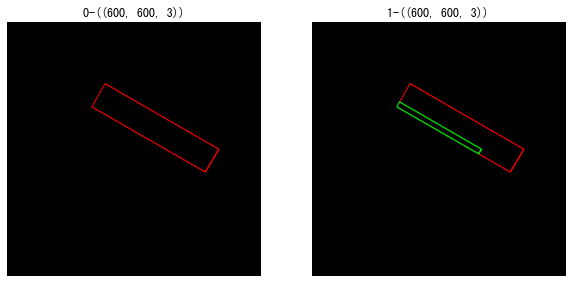

In [2]:
from math import tan,pi
import numpy as np
import cv2

# 根据对角点以及角度，计算剩余的2个点
def calculate_remaining_vertices_of_rotated_rectangle(A, B, rotation_angle):

    if rotation_angle==0 or rotation_angle==90:
        x1,y1=A[0],B[1]
        x2,y2=B[0],A[1]
    else:
        q = rotation_angle*pi/180  # 另一边与x轴的角度
        p = pi/2-q  # 旋转角度

        # 计算剩下的两个点
        x1=(tan(p)*B[0]+tan(q)*A[0]+B[1]-A[1])/((tan(p)+tan(q)))
        y1=B[1]+tan(p)*(B[0]-x1)

        x2=(A[1]-B[1]+tan(p)*A[0]+tan(q)*B[0])/(tan(p)+tan(q))
        y2=B[1]+tan(q)*(x2-B[0])

    return (x1,y1),(x2,y2)

def show_rotated_rectangle(img,A, B, rotation_angle,color=(255, 0, 0)):
    remaining_vertices=calculate_remaining_vertices_of_rotated_rectangle(A,B,rotation_angle)
    pts1 = np.array([A,remaining_vertices[0],B,remaining_vertices[1]], np.int32)
    pts1 = pts1.reshape((-1, 1, 2))
    print(pts1)
    cv2.polylines(img, [pts1], isClosed=True, color=color, thickness=2)

    return img


# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 30  # 30度
image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image.copy(),A, B, rotation_angle)

A = (200, 200)
B = (400, 300)
image2=show_rotated_rectangle(image1.copy(),A, B, rotation_angle,color=(0,255,0))

show_images([image1,image2])

[[[200 200]]

 [[468 354]]

 [[500 300]]

 [[231 145]]]
[[[300 250]]

 [[471 349]]

 [[500 300]]

 [[328 200]]]


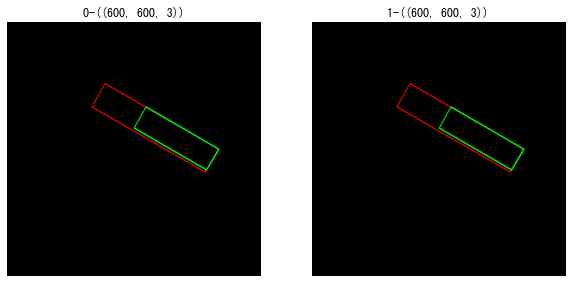

In [3]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 30  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image1,image2])

[[[200 200]]

 [[381  95]]

 [[500 300]]

 [[318 404]]]
[[[300 250]]

 [[428 175]]

 [[500 300]]

 [[371 374]]]


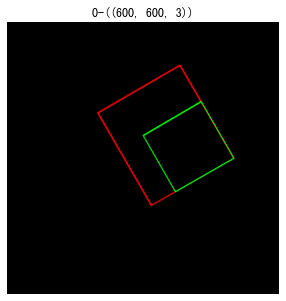

In [4]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = -30  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image2])

[[[200 200]]

 [[318 404]]

 [[500 300]]

 [[381  95]]]
[[[300 250]]

 [[371 374]]

 [[500 300]]

 [[428 175]]]


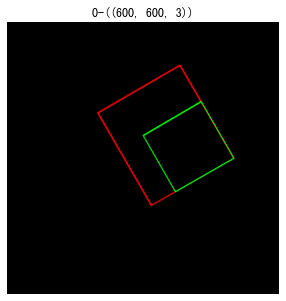

In [5]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 60  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image2])

[[[200 200]]

 [[201 305]]

 [[500 300]]

 [[498 194]]]
[[[300 250]]

 [[300 303]]

 [[500 300]]

 [[499 246]]]


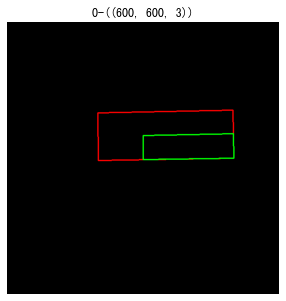

In [6]:
# 初始状态的对角点
A = (200, 200) # (x,y)
B = (500, 300)
rotation_angle = 89  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image1=show_rotated_rectangle(image,A, B, rotation_angle)

A = (300, 250)
B = (500, 300)
image2=show_rotated_rectangle(image1,A, B, rotation_angle,color=(0,255,0))

show_images([image2])

[[[150 200]]

 [[350 400]]

 [[300 450]]

 [[ 99 250]]]


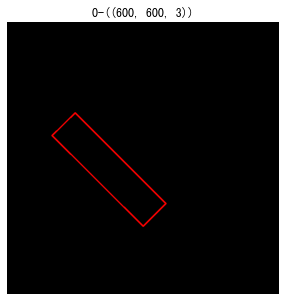

In [7]:
# 初始状态的对角点
A = (150, 200) # (x,y)
B = (300, 450)
rotation_angle = 45  # 30度

image = np.zeros((600, 600, 3), dtype=np.uint8)
image=show_rotated_rectangle(image,A, B, rotation_angle)

show_images([image])

In [8]:
def sort_vertices(allvertices):
    sorted_points = sorted(allvertices, key=lambda point: (point[0], point[1]))
    print(sorted_points)


allvertices=[
        [100,100],
        [100,200]
]
sort_vertices(allvertices)

[[100, 100], [100, 200]]


In [9]:
allvertices=[
        [100,100],
        [100,200],
        [200,100],
        [200,200]
]
sort_vertices(allvertices)

[[100, 100], [100, 200], [200, 100], [200, 200]]


In [10]:
allvertices=[
        [100,100],
        [110,200]
]
sort_vertices(allvertices)

[[100, 100], [110, 200]]


In [11]:
allvertices=[
        [300,100],
        [100,200]
]
sort_vertices(allvertices)

[[100, 200], [300, 100]]


In [12]:
allvertices=[
        [300,100],
        [100,200],
        [400,150]
]
sort_vertices(allvertices)

[[100, 200], [300, 100], [400, 150]]


In [13]:
allvertices=[
        [300,100],
        [100,200],
        [400,150],
        [300,300]
]
sort_vertices(allvertices)

[[100, 200], [300, 100], [300, 300], [400, 150]]


# 旋转矩形，计算4个点

In [14]:
import math


def get_center(points):
    """计算几何中心"""
    x_sum = 0
    y_sum = 0
    for point in points:
        x_sum += point[0]
        y_sum += point[1]
    return x_sum / len(points), y_sum / len(points)

def sort_points(points):
    """按顺时针排序点"""
    # 计算几何中心
    center=get_center(points)

    # 计算每个点与几何中心的角度值
    angles = []
    for point in points:
        dx = point[0] - center[0]
        dy = point[1] - center[1]
        angle = math.atan2(dy, dx)
        angles.append(angle)
    # 根据角度值进行排序
    sorted_points = [point for _, point in sorted(zip(angles, points))]
    return sorted_points

def rotate_point(x, y, theta):
    """旋转一个点"""
    cos_theta = math.cos(math.radians(theta))
    sin_theta = math.sin(math.radians(theta))
    x_prime = x * cos_theta - y * sin_theta
    y_prime = x * sin_theta + y * cos_theta
    return x_prime, y_prime

def get_rectangle_points(center_x, center_y, width, height, angle):
    """获取矩形四个点的坐标"""
    # 计算未旋转前矩形四个点的坐标
    half_width = width / 2
    half_height = height / 2
    points = [
        (center_x - half_width, center_y + half_height),
        (center_x + half_width, center_y + half_height),
        (center_x - half_width, center_y - half_height),
        (center_x + half_width, center_y - half_height)
    ]
    # 对每个点进行旋转变换
    rotated_points = []
    for point in points:
        x, y = point
        x_prime, y_prime = rotate_point(x - center_x, y - center_y, angle)
        rotated_points.append((x_prime + center_x, y_prime + center_y))
    return rotated_points

def draw_rec(img,points,color):
    pts1 = np.array(sort_points(points), np.int32)
    pts1 = pts1.reshape((-1, 1, 2))
    cv2.polylines(img, [pts1], isClosed=True, color=color, thickness=2)
    return img

[[200 275]
 [400 275]
 [400 325]
 [200 325]]
------------------------------
[[200 271]
 [225 228]
 [399 328]
 [374 371]]
------------------------------
[[275 200]
 [325 200]
 [325 400]
 [275 400]]
------------------------------
[[328 200]
 [371 225]
 [271 399]
 [228 374]]
------------------------------
[[385 242]
 [402 289]
 [214 357]
 [197 310]]
------------------------------


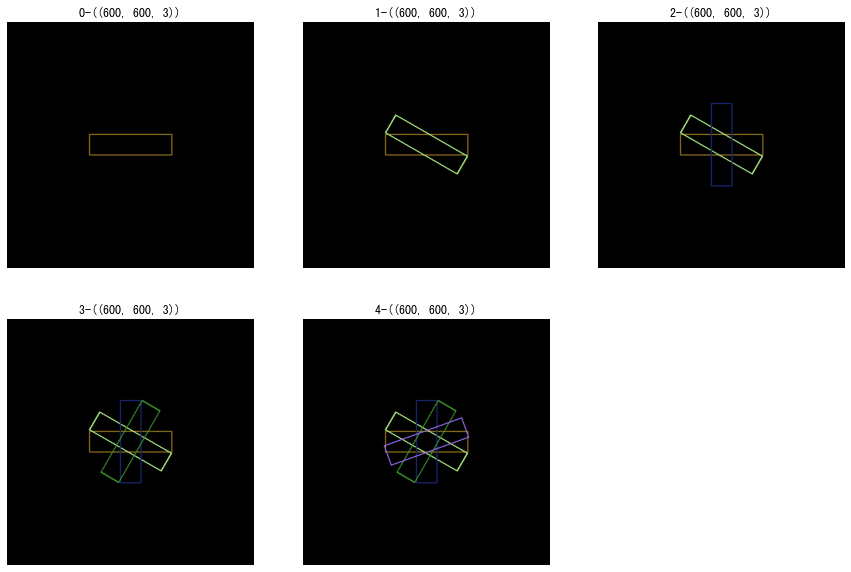

In [15]:
import cv2
import numpy as np
import random

# 示例用法
center_x = 300
center_y = 300
width = 200
height = 50
# angle = 0

img = np.zeros((600, 600, 3), dtype=np.uint8)
allimg=[img]
colors=[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for i in range(100)]
for i,angle in enumerate([0,30,90,120,160]):
    points = get_rectangle_points(center_x, center_y, width, height, angle)
    print(np.int0(sort_points(points)))

    img1=draw_rec(allimg[-1].copy(),points,colors[i])
    allimg.append(img1)
    print('------'*5)

show_images(allimg[1:])

# 已知两个点+鼠标位置，计算这个旋转矩形的四个点

In [33]:
def segments_intersect(segment1, segment2):
    # 提取线段的端点
    (x1, y1), (x2, y2) = segment1
    (x3, y3), (x4, y4) = segment2
    
    # 检查线段的边界框是否相交
    if (min(x1, x2) > max(x3, x4) or max(x1, x2) < min(x3, x4) or
        min(y1, y2) > max(y3, y4) or max(y1, y2) < min(y3, y4)):
        return False
    
    # 计算叉积
    def cross_product(x1, y1, x2, y2):
        return x1 * y2 - x2 * y1
    
    def check_orientation(x1, y1, x2, y2, x3, y3):
        return cross_product(x2 - x1, y2 - y1, x3 - x1, y3 - y1)
    
    orientation1 = check_orientation(x1, y1, x2, y2, x3, y3)
    orientation2 = check_orientation(x1, y1, x2, y2, x4, y4)
    orientation3 = check_orientation(x3, y3, x4, y4, x1, y1)
    orientation4 = check_orientation(x3, y3, x4, y4, x2, y2)
    
    # 如果端点的方向不同，则线段相交
    if (orientation1 * orientation2 <= 0) and (orientation3 * orientation4 <= 0):
        return True
    
    return False

def GetSegmentIntersection(A,B,width,height):
    # 判断投影点和A连续与哪个边界相交
    top=[[0,0],[width,0]]
    bottom=[[0,height],[width,height]]
    left=[[0,0],[0,height]]
    right=[[width,0],[width,height]]

    nowSegment=[A,B]
    IntersectionPoint=[-1,-1]
    if segments_intersect(nowSegment,top) or segments_intersect(nowSegment,bottom):
        if A[1]>height:IntersectionPoint[1]=height
        if A[1]<0:IntersectionPoint[1]=0
        if A[0]!=B[0]:
            # 计算斜率
            slope = (A[1]-B[1]) / (A[0]-B[0])

            # 计算截距
            intercept =B[1] - slope * B[0]

            IntersectionPoint[0]=(IntersectionPoint[1]-intercept)/slope
        else:
            # 如果斜率不存在（即直线垂直于 x 轴）
            IntersectionPoint[0]=B[0]
        
        return IntersectionPoint

    if segments_intersect(nowSegment,left) or segments_intersect(nowSegment,right):
        if A[0]>width:IntersectionPoint[0]=width
        if A[0]<0:IntersectionPoint[0]=0
        if A[0]!=B[0]:
            # 计算斜率
            slope = (A[1] - B[1]) / (A[0] - B[0])

            # 计算截距
            intercept =B[1] - slope * B[0]

            IntersectionPoint[1]=slope*IntersectionPoint[0]+intercept
        else:
            # 如果斜率不存在（即直线垂直于 x 轴）
            IntersectionPoint[1]=B[1]
        
        return IntersectionPoint


def perpendicular_line(A, B):
    # 计算向量AB的垂直向量
    if A[0] == B[0]:
        vertical_vector = [1, 0]
    else:
        vertical_vector = [-(B[1] - A[1]) / (B[0] - A[0]), 1]

    return vertical_vector

def find_fourth_point(A, B, C):
    CA = [C[0] - A[0], C[1] - A[1]]
    D=[B[0]+CA[0],B[1]+CA[1]]
    return D

def projection_point_on_perpendicular_line(A, B, C,width=300,height=300):
    # 计算垂直向量
    vertical_vector = perpendicular_line(A, B)

    # 计算向量AC
    AC = [C[0] - A[0], C[1] - A[1]]

    # 计算投影点的比例系数
    ratio = (vertical_vector[0] * AC[0] + vertical_vector[1] * AC[1]) / (vertical_vector[0] ** 2 + vertical_vector[1] ** 2)

    # 计算投影点的坐标
    projection_x = A[0] + vertical_vector[0] * ratio
    projection_y = A[1] + vertical_vector[1] * ratio
    print(f'未修正前：{projection_x},{projection_y}')

    # 如果坐标超出边界，对坐标进行修正
    vertices=[A,B]
    projectionPoint=[projection_x,projection_y]
    new_projectionPoint=projectionPoint
    if (projection_x < 0 or projection_x > width or projection_y < 0 or projection_y > height):
        new_projectionPoint = GetSegmentIntersection(projectionPoint, A, width, height)
        # 基于3个定点，求第四个点
        fourthPoint = find_fourth_point(A, B, new_projectionPoint)
    else:
        # 基于3个定点，求第四个点
        fourthPoint = find_fourth_point(A, B, projectionPoint)

    if (fourthPoint[0] < 0 or fourthPoint[0] > width or fourthPoint[1] < 0 or fourthPoint[1] > height):
        new_fourthPoint = GetSegmentIntersection(fourthPoint, B, width, height)
        # 基于3个定点，求第四个点
        new_projectionPoint = find_fourth_point(B, A, new_fourthPoint)

        vertices.append(new_fourthPoint)
        vertices.append(new_projectionPoint)
    else:
        vertices.append(fourthPoint)
        vertices.append(new_projectionPoint)

    return vertices

[413, 385]
未修正前：317.0830945558739,39.69914040114614
[[100, 100], [150, 280], [300, 238.33333333333331], [250, 58.333333333333314]]


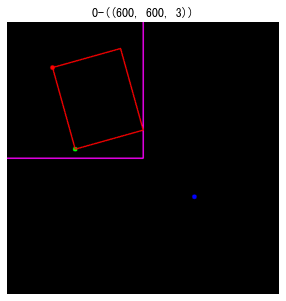

In [104]:
import cv2
import random

img = np.zeros((600, 600, 3), dtype=np.uint8)

A = [100, 100]
B = [150, 280]
# C = [random.randint(100,200), random.randint(300,500)]
C = [random.randint(-300,500), random.randint(-300,500)]
# C=[171, 475]
print(C)

width=300
height=300
vertices = projection_point_on_perpendicular_line(A, B, C,width,height)
print(vertices)

pts1 = np.array(vertices).reshape((-1, 1, 2))
pts1=np.int0(pts1)
cv2.circle(img, A, 5, (255,0,0), -1)
cv2.circle(img, B, 5, (0,255,0), -1)
cv2.circle(img, C, 5, (0,0,255), -1)

cv2.line(img, (width,0), (width,height), (255,0,255), 2)
cv2.line(img, (0,height), (width,height), (255,0,255), 2)
cv2.polylines(img, [pts1], isClosed=True, color=(255,0,0), thickness=2)
show_images([img])

# 已知四个点位置，求旋转矩形角度

(323.0, 295.4999694824219) (309.7359924316406, 43.041709899902344) 29.882831573486328


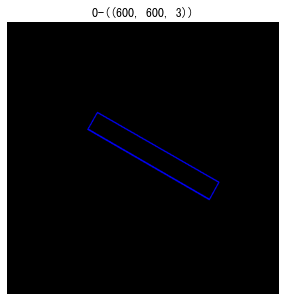

In [7]:
points=np.array([[200,200],[468,354],[446,391],[178,237]])

# 创建一个旋转矩形
rect = cv2.minAreaRect(points)

# 获取矩形的中心点坐标、宽、高和角度
center, size, angle = rect
print(center, size, angle)

# 将浮点型坐标转换为整型坐标
center = (int(center[0]), int(center[1]))
size = (int(size[0]), int(size[1]))

img = np.zeros((600, 600, 3), dtype=np.uint8)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)
show_images([img])

In [8]:
def min_area_rect(points):
    # 点的个数
    num_points = len(points)

    # 找到最小矩形
    min_area = float('inf')
    min_rect = None

    for i in range(num_points):
        # 获取三个相邻点
        p1 = points[i]
        p2 = points[(i + 1) % num_points]
        p3 = points[(i + 2) % num_points]

        # 计算两个边的向量
        v1 = (p2[0] - p1[0], p2[1] - p1[1])
        v2 = (p3[0] - p2[0], p3[1] - p2[1])

        # 计算两个边的长度
        length1 = math.sqrt(v1[0] ** 2 + v1[1] ** 2)
        length2 = math.sqrt(v2[0] ** 2 + v2[1] ** 2)

        # 计算两个边的单位向量
        unit_v1 = (v1[0] / length1, v1[1] / length1)
        unit_v2 = (v2[0] / length2, v2[1] / length2)

        # 计算两个边的夹角
        dot_product = unit_v1[0] * unit_v2[0] + unit_v1[1] * unit_v2[1]
        angle = math.acos(max(min(dot_product, 1), -1))

        # 计算矩形的面积
        area = length1 * length2 * math.sin(angle)

        # 更新最小面积和对应的矩形
        if area < min_area:
            min_area = area
            # 计算中心点
            center_x = (p1[0] + p3[0]) / 2
            center_y = (p1[1] + p3[1]) / 2
            # 计算宽度和高度
            width = length1
            height = length2
            # 计算角度
            angle_degrees = math.degrees(math.atan2(v1[1], v1[0]))

    return (center_x, center_y), (width, height), angle_degrees

In [9]:
min_area_rect(points)

((323.0, 295.5), (309.0954545120326, 43.04648650006177), 29.882832345412833)